<a href="https://colab.research.google.com/github/Sargo258/tomates-IA/blob/main/tomates_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DataSet.zip to DataSet.zip


In [ ]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['DataSet.zip']), 'r')
data.extractall()

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
pandas_folder_path="/content/DataSet/tomatemalo"
tomateinfectado=[]
img_size=150
for img in os.listdir(pandas_folder_path):
    img = cv2.imread(os.path.join(pandas_folder_path,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    tomateinfectado.append(img_resize)

tomateinfectado = np.array(tomateinfectado)
print(tomateinfectado.shape)

(1964, 150, 150, 3)


In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
pandas_folder_path="/content/DataSet/tomatebueno"
tomatebueno=[]
img_size=150
for img in os.listdir(pandas_folder_path):
    img = cv2.imread(os.path.join(pandas_folder_path,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    tomatebueno.append(img_resize)

tomatebueno = np.array(tomatebueno)
print(tomatebueno.shape)

(1736, 150, 150, 3)


(150, 150, 3)


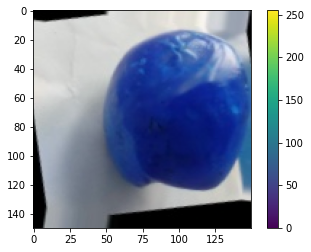

In [ ]:
print(tomateinfectado[10].shape)
plt.figure()
plt.imshow(np.squeeze(tomateinfectado[10]))
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
images = np.concatenate([tomateinfectado,tomatebueno])
print(len(images))
Images = np.array(images)
print(Images.shape)

3700
(3700, 150, 150, 3)


In [ ]:
labels_tomateinfectado = np.repeat(0,1964)
print(len(labels_tomateinfectado))
print(labels_tomateinfectado)

1964
[0 0 0 ... 0 0 0]


In [ ]:
labels_tomatebueno = np.repeat(1,1736)
print(len(labels_tomatebueno))
print(labels_tomatebueno)

1736
[1 1 1 ... 1 1 1]


In [ ]:
class_names=['tomateinfectado','tomatebuenos']

In [ ]:
labels = np.concatenate([labels_tomateinfectado,labels_tomatebueno])
print(len(labels))
print(labels)
Labels = np.array(labels)
print(Labels.shape)

3700
[0 0 0 ... 1 1 1]
(3700,)


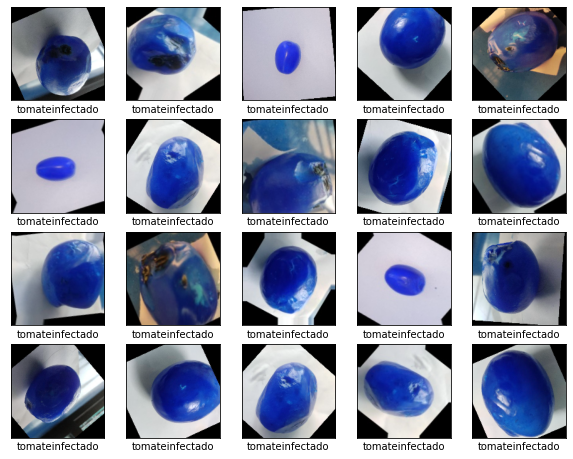

In [ ]:
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Images[i])
  plt.xlabel(class_names[Labels[i]])
plt.show()



In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

variable_name = ""
try:

  %tensorflow_version 2.x
except Exception:
  pass

from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.optimizers as Optimizer

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

model = keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")

])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(Images, Labels,)
trained=model.fit(Images, Labels, epochs=180)



2.6.0
116/116 [==============================] - 5s 38ms/step - loss: 28.5096 - accuracy: 0.6235
Epoch 1/180
116/116 [==============================] - 4s 37ms/step - loss: 0.3849 - accuracy: 0.8289
Epoch 2/180
116/116 [==============================] - 4s 38ms/step - loss: 0.2410 - accuracy: 0.8965
Epoch 3/180
116/116 [==============================] - 4s 38ms/step - loss: 0.1966 - accuracy: 0.9157
Epoch 4/180
116/116 [==============================] - 4s 38ms/step - loss: 0.1442 - accuracy: 0.9427
Epoch 5/180
116/116 [==============================] - 4s 38ms/step - loss: 0.1469 - accuracy: 0.9419
Epoch 6/180
116/116 [==============================] - 4s 38ms/step - loss: 0.1161 - accuracy: 0.9524
Epoch 7/180
116/116 [==============================] - 4s 38ms/step - loss: 0.0863 - accuracy: 0.9657
Epoch 8/180
116/116 [==============================] - 4s 38ms/step - loss: 0.1189 - accuracy: 0.9519
Epoch 9/180
116/116 [==============================] - 4s 38ms/step - loss: 0.0878 - ac

In [ ]:
test_loss, test_acc = model.evaluate(Images, Labels, verbose=2)

print('\nTest accuracy:', test_acc)
predictions = model.predict(Images)
print(predictions[0])
print(np.sum(predictions[0]))
np.argmax(predictions[0])
Labels[0]


116/116 - 1s - loss: 0.0358 - accuracy: 0.9762

Test accuracy: 0.976216197013855
[9.9999583e-01 3.5047537e-06 1.1135554e-13 7.4039043e-20 1.0007433e-12
 5.8582562e-16 7.0438438e-07 5.5561404e-09 2.0996660e-09 7.3206525e-15]
1.0


0

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

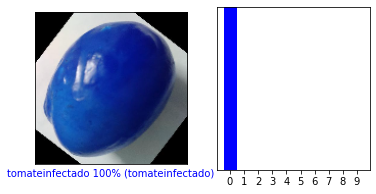

In [ ]:
i = 266
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], Labels, Images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  Labels)
plt.show()

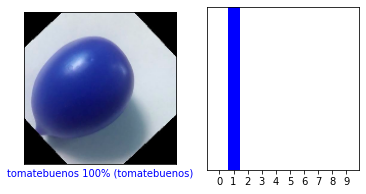

In [ ]:
i = 3100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], Labels, Images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  Labels)
plt.show()

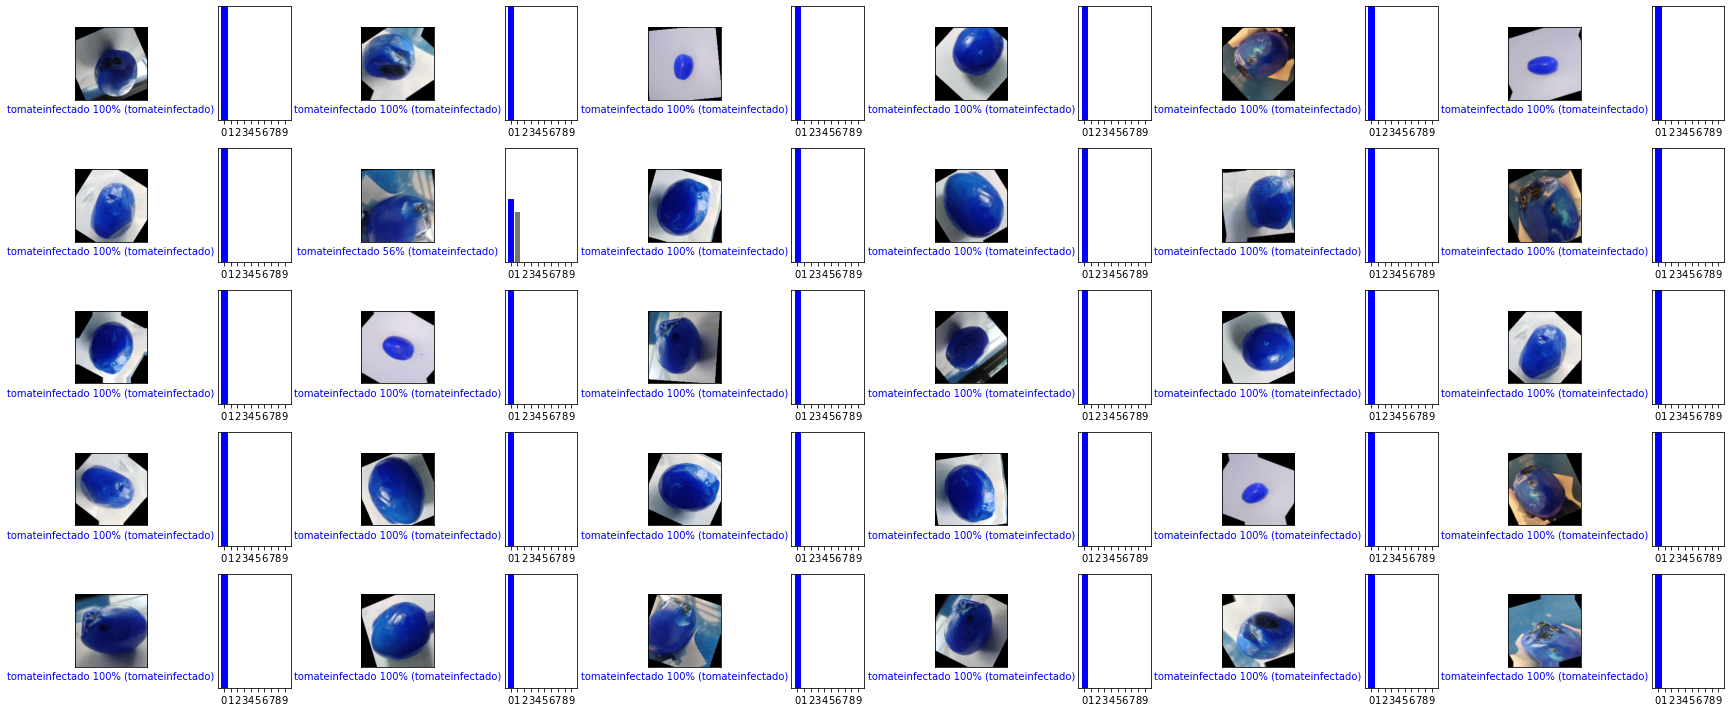

In [ ]:
num_rows = 5
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], Labels, Images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], Labels)
plt.tight_layout()
plt.show()